### Hacemos nuestra variable target

In [202]:
import pandas as pd
df = pd.read_csv('csvs/total_locales.csv')

In [203]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [204]:
df.isnull().sum()

id_local                         0
id_distrito_local                0
desc_distrito_local              0
id_barrio_local              45794
desc_barrio_local            45794
desc_seccion_censal_local       13
coordenada_x_local               0
coordenada_y_local               0
desc_situacion_local             0
rotulo                       49616
fecha                            0
id_seccion                   92836
desc_seccion                 92836
id_division                  92836
desc_division                92836
id_epigrafe                  92836
desc_epigrafe                92836
id_epigrafe_bueno            92836
desc_epigrafe_bueno          92836
dtype: int64

### Sec. Censal

In [16]:
df.desc_seccion_censal_local.unique()

array([ 88., 106.,  58.,  14.,  82., 119.,  74.,  77., 123.,  84., 112.,
       121.,  35.,  59., 124.,   8.,  65.,  22.,  62.,  32.,  37.,  47.,
        18.,   6.,   3.,  64.,  63.,  69.,  13.,  24.,  48.,  42.,  89.,
       103.,  73.,  23.,  21.,  12., 110.,  72.,  25.,  28.,  54., 117.,
        61.,  90.,  11.,  68.,  33.,  27., 118.,  43.,  79.,  75.,  71.,
        38.,  81.,  95.,  20.,   1., 109.,  34.,  15., 116.,  94., 101.,
        26., 114.,  93., 102.,  67.,  99.,   9., 105., 120.,  87.,  66.,
         4.,  39.,  76.,  56.,  45.,   2.,  91.,  51., 111.,  97., 113.,
        55.,  46.,  92.,  41.,  57.,  50., 104., 108.,  16.,  19., 115.,
       107.,  29.,   7., 100.,  96.,  31.,  98.,  49.,  53.,  36.,  78.,
        30.,  40.,  70.,  80.,  44.,  86.,  83.,  17.,   5.,  85.,  60.,
        52.,  nan,  10., 127., 128., 126., 129., 130., 122., 125., 135.,
       132., 131., 138., 174., 142., 153., 159., 134., 154., 162., 139.,
       137., 156., 180., 148., 166., 147., 144., 14

In [14]:
seccensal = pd.read_excel(r"C:\Users\María\Downloads\secc21.xls")
seccensal = seccensal[seccensal.dsmun=='Madrid']
seccensal

,cdmun4,cdmun3,dsmun,literalmun,cddistrito,cdseccion,cdtseccion
124,796,79,Madrid,Madrid,14,52,7914052
125,796,79,Madrid,Madrid,14,53,7914053
126,796,79,Madrid,Madrid,14,54,7914054
127,796,79,Madrid,Madrid,14,55,7914055
128,796,79,Madrid,Madrid,14,56,7914056
...,...,...,...,...,...,...,...
4417,796,79,Madrid,Madrid,11,191,7911191
4418,796,79,Madrid,Madrid,11,192,7911192
4419,796,79,Madrid,Madrid,8,16,7908016
4420,796,79,Madrid,Madrid,8,17,7908017


In [15]:
seccensal.cddistrito.unique()

array([14, 15, 16, 18, 13, 17, 19,  1,  2,  4,  5,  3,  6, 21, 12, 20,  8,
       11,  7, 10,  9], dtype=int64)

 ### Termina sec.censal

### Más preprocesamiento  
## Locales que se convierten en otros y no cierran

In [5]:
df[df.id_barrio_local.isnull()]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
124,10001014.0,2.0,arganzuela,NaN,NaN,20.0,0,0,Baja R,vips,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,10001288.0,1.0,centro,NaN,NaN,93.0,0,0,Baja R,gildas,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,10001447.0,1.0,centro,NaN,NaN,124.0,"440285,59","4474392,53",Cerrado,o2,2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,10001753.0,1.0,centro,NaN,NaN,120.0,"440180,59","4474061,53",Cerrado,la capilla de la bolsa,2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2688,40001318.0,3.0,retiro,NaN,NaN,50.0,0,0,Baja R,dia,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245386,290001341.0,18.0,villa de vallecas,NaN,NaN,46.0,443789.4375,4468316.0,Abierto,sin actividad,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245388,290001342.0,18.0,villa de vallecas,NaN,NaN,46.0,443785.8125,4468320.5,Abierto,sin actividad,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245390,290001343.0,18.0,villa de vallecas,NaN,NaN,46.0,443782.3125,4468325.0,Abierto,sin actividad,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245392,290001344.0,18.0,villa de vallecas,NaN,NaN,46.0,443778.8125,4468330.0,Abierto,sin actividad,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
0,10000003.0,1.0,centro,14.0,justicia,88.0,"440664,26","4475546,14",Abierto,vitaca,2014-06-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561006.0,cafeteria,5610.0,Restaurantes y puestos de comidas
1,10000004.0,1.0,centro,15.0,universidad,106.0,"440055,41","4475799,55",Abierto,bar la parada,2014-06-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561006.0,cafeteria,5610.0,Restaurantes y puestos de comidas
2,10000013.0,1.0,centro,12.0,embajadores,58.0,"441309,38","4473534,81",Abierto,rótulo no informado,2014-06-01,I,Hostelería,55.0,Servicios de alojamiento,551001.0,hoteles y moteles con restaurante,5510.0,Hoteles y alojamientos similares
3,10000044.0,1.0,centro,11.0,palacio,14.0,"439832,85","4473758,99",Abierto,v.m. vinomania,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472502.0,comercio al por menor de vinos y alcoholes (bo...,4725.0,Comercio al por menor de bebidas en establecim...
4,10000044.0,1.0,centro,11.0,palacio,14.0,"439722,59","4473550,53",Cerrado,v.m. vinomania,2021-11-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472502.0,comercio al por menor de vinos y alcoholes (bo...,4725.0,Comercio al por menor de bebidas en establecim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247081,300022016.0,15.0,ciudad lineal,159.0,costillares,168.0,0,0,Abierto,sin actividad,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247082,300022017.0,7.0,chamberi,74.0,almagro,91.0,0,0,Abierto,sin actividad,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247083,300022018.0,7.0,chamberi,73.0,trafalgar,64.0,0,0,Abierto,alma of spain restaurante,2021-11-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561004.0,bar restaurante,5610.0,Restaurantes y puestos de comidas
247084,300022019.0,6.0,tetuan,62.0,cuatro caminos,29.0,0,0,Abierto,parking publico,2021-11-01,G,Comercio al por mayor y al por menor; reparaci...,45.0,Venta y reparación de vehículos de motor y mot...,452004.0,mantenimiento y reparacion de vehiculos de mot...,4520.0,Mantenimiento y reparación de vehículos de motor


In [18]:
df.iloc[1, :]

id_local                                            10000004.0
id_distrito_local                                          1.0
desc_distrito_local                                     centro
id_barrio_local                                           15.0
desc_barrio_local                                  universidad
desc_seccion_censal_local                                106.0
coordenada_x_local                                   440055,41
coordenada_y_local                                  4475799,55
desc_situacion_local                                   Abierto
rotulo                                           bar la parada
fecha                                               2014-06-01
id_seccion                                                   I
desc_seccion                                        Hostelería
id_division                                               56.0
desc_division                   Servicios de comidas y bebidas
id_epigrafe                                           5

In [29]:
df[2:3]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
2,10000013.0,1.0,centro,12.0,embajadores,58.0,"441309,38","4473534,81",Abierto,rótulo no informado,2014-06-01,I,Hostelería,55.0,Servicios de alojamiento,551001.0,hoteles y moteles con restaurante,5510.0,Hoteles y alojamientos similares


In [39]:
ids = []
hola = pd.DataFrame()
for i in df.index:
    if (df.id_local.iloc[i]==df.id_local.iloc[i+1]) & (df.id_division.iloc[i]!=df.id_division.iloc[i+1]) & (df.desc_situacion_local[i]=='Abierto') & (df.rotulo.iloc[i]!=df.rotulo.iloc[i+1]):
        ids.append(df.id_local.iloc[i])
        pd.concat([hola, df[i:i+1]])

IndexError: single positional indexer is out-of-bounds

In [42]:
ids
#estos serian los id de locales que se convierten en otros y no cierran

[10000308.0,
 10000468.0,
 10000684.0,
 10001569.0,
 10001574.0,
 10001656.0,
 10001786.0,
 10001824.0,
 10001909.0,
 10002513.0,
 10002645.0,
 10002848.0,
 10002989.0,
 10003433.0,
 10003560.0,
 10003657.0,
 20000110.0,
 20000147.0,
 20000302.0,
 20000357.0,
 20000461.0,
 20001192.0,
 20001262.0,
 20001299.0,
 20001323.0,
 20001495.0,
 20001505.0,
 20001612.0,
 20001620.0,
 20001654.0,
 20001723.0,
 20001752.0,
 20001833.0,
 20001861.0,
 30000178.0,
 30000855.0,
 30000999.0,
 30001001.0,
 30001211.0,
 30001231.0,
 30001256.0,
 40000030.0,
 40000088.0,
 40001632.0,
 40002121.0,
 40002309.0,
 40002357.0,
 40002414.0,
 40002452.0,
 40002738.0,
 40002767.0,
 40002876.0,
 40002929.0,
 40002992.0,
 40003013.0,
 40003085.0,
 50000218.0,
 50001178.0,
 50001178.0,
 50001385.0,
 50001549.0,
 50001746.0,
 50002042.0,
 60000426.0,
 60000429.0,
 60000921.0,
 60001510.0,
 60001723.0,
 60002393.0,
 60003001.0,
 70000360.0,
 70000849.0,
 70001066.0,
 70001272.0,
 70001314.0,
 70001539.0,
 70001668.0,

In [205]:
df[df.id_local==200001110.0]
#como este

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
13455,200001110.0,20.0,san blas-canillejas,201.0,simancas,119.0,"446735,78","4476384,92",Abierto,atd restauradores sl,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472405.0,"comercio al por menor de pasteleria, confiteri...",4724.0,Comercio al por menor de pan y productos de pa...
13456,200001110.0,20.0,san blas-canillejas,201.0,simancas,119.0,"446625,56","4476176,45",Abierto,el horno,2018-01-01,P,Educación,85.0,Educación,855002.0,"enseaanza no reglada (deportiva y recreativa, ...",8550.0,"enseaanza no reglada (deportiva y recreativa, ..."


In [46]:
df[df.id_local== 20000110.0]
#pero en este caso no es así, porque el atrapallada sigue abierto

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
1024,20000110.0,2.0,arganzuela,22.0,acacias,20.0,"440186,3","4473071,12",Abierto,restaurante atrapallada,2014-06-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561004.0,bar restaurante,5610.0,Restaurantes y puestos de comidas
1025,20000110.0,2.0,arganzuela,22.0,acacias,20.0,"440076,59","4472863,53",Abierto,enxebre,2018-01-01,Z,SIN ACTIVIDAD,0.0,SIN ACTIVIDAD,0.0,local sin actividad,0.0,local sin actividad


In [4]:
df[df.id_local== 10000308.0]
#pero aqui por ejemplo es el mismo negocio, es el colegio

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
29,10000308.0,1.0,centro,12.0,embajadores,37.0,"440244,62","4473350,64",Abierto,escuela emilia pardo bazan,2014-06-01,I,Hostelería,56.0,Servicios de comidas y bebidas,562902.0,servicios de comedor en centros educativos y c...,5629.0,Otros servicios de comidas
30,10000308.0,1.0,centro,12.0,embajadores,37.0,"440134,59","4473142,53",Abierto,ceip emilia pardo bazan,2018-01-01,P,Educación,85.0,Educación,852001.0,centro de infantil y primaria publico,8520.0,Educación primaria


#### Vamos a dejarlos porque total nos da igual

# Creamos Duración

Filtramos todos los abiertos pero hay que tener en cuenta que hay muchos de esos abiertos que luego cierran y no pueden entrar al modelo porque en vd son locales que no es que sigan abiertos.  
Después de todo el proceso habría que filtrar de los abiertos cuáles están tb en cerrado (que coincidan en id y actividad comercial y rótulo (el rótulo puede entrar porque eliminamos antes duplicados)) y eliminarlos para entrar al modelo.

In [206]:
import datetime

df['Duracion'] = 0

current_date = datetime.datetime(2022, 5, 1)

for i in df.index:
    if (df['desc_situacion_local'][i] == 'Abierto'):
        df['Duracion'][i] = (current_date - df['fecha'][i]).days

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_9116/1841186715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duracion'][i] = (current_date - df['fecha'][i]).days


In [207]:
noabiertos = df[df['desc_situacion_local'] !='Abierto']
abiertos = df[df['desc_situacion_local'] =='Abierto']
abiertos.reset_index(drop = True, inplace = True)
noabiertos.reset_index(drop = True, inplace = True)        

In [208]:
print(len(noabiertos), ',', noabiertos.id_local.nunique(), ',', noabiertos.desc_situacion_local.nunique(), '------', len(abiertos), ',', abiertos.id_local.nunique())

116436 , 65727 , 6 ------ 130650 , 114134


In [209]:
noabiertos.desc_situacion_local.unique()

array(['Cerrado', 'Baja R', 'Uso vivienda', 'Baja', 'En obras',
       'Baja PC Asociado'], dtype=object)

In [210]:
#borro los duplicados en abiertos y cerrados, que los hay
abiertos.drop_duplicates(subset = ['id_local', 'rotulo'], keep="first", inplace = True)
noabiertos.drop_duplicates(subset = ['id_local', 'desc_situacion_local', 'rotulo'], keep="first", inplace = True)
abiertos.reset_index(drop = True, inplace = True)
noabiertos.reset_index(drop = True, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [211]:
abiertosfecha = abiertos.loc[abiertos['id_local'].isin(noabiertos.id_local)]
abiertosfecha.reset_index(drop = True, inplace = True)

In [212]:
print(len(abiertosfecha), len(noabiertos), noabiertos.id_local.nunique())

30092 110832 65727


Hay más cerrados que abiertos, por lo que habrá locales de los cuales se ha registrado su cierre, pero no su apertura. Puede ser porque solo tengo registros desde junio de 2014, pero ahora que lo pienso en teoría yo debería tener desde 2014 un registro de todos los locales que abrieron. Puede ser porque he borrado cosas a diestro y siniestro. En ese caso solo me podré quedar con 17996 no aperturas (cierres o lo que sea)

In [213]:
#problemitasssssssssssss
#contar en la memoria que, dado que hay locales que comparten id porque uno cierra y se abre otro en la misma localizacion
#y con la misma descripcion de seccion y epigrafe cnae, tenemos que filtrar siempre teniendo en cuenta el rotulo
df[df.id_local == 10000299.0]
'''esto es lo que estaba intentando solucionar antes y que he pasado'''

'esto es lo que estaba intentando solucionar antes y que he pasado'

In [214]:
for i in noabiertos.index:
    id_local = noabiertos['id_local'][i]
    rotulo = noabiertos['rotulo'][i]
    #dado que hay registros de cierre de los cuales no tengo apertura, solo entro a añadir duracion si tengo ambas fechas 
    if (((abiertosfecha.id_local == id_local) & (abiertosfecha.rotulo == rotulo)).any() == True):
        #busco el resgistro con el mismo rotulo y descripcion 
        registro_apertura = abiertosfecha.loc[(abiertosfecha.id_local == id_local) & (abiertosfecha.rotulo == rotulo)].index[0]
        noabiertos['Duracion'][i] = abs((noabiertos['fecha'][i] - abiertosfecha['fecha'][registro_apertura]).days)

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_9116/3304692959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noabiertos['Duracion'][i] = abs((noabiertos['fecha'][i] - abiertosfecha['fecha'][registro_apertura]).days)


In [215]:
noabiertos.loc[noabiertos.id_local == 10000299.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
2,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Cerrado,pescados tetuan c.b. / locales 44 al 48,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...,0


In [216]:
abiertos[abiertos.id_local == 10000894.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion


In [217]:
#PROBLEMA CON LOS NEGATIVOS, QUE SON TODOS AQUELLOS EN LOS QUE SE REGISTRO SU CIERRA EN LA PRIMERA FECHA
'''que hago con estos'''
noabiertos[noabiertos.Duracion < 0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion


In [218]:
#De estos no tengo registro de apertura, ¿los borro? yo digo sí
#Los borraré ya cuando estén en df
problems = noabiertos[noabiertos.Duracion == 0]
problems
# cerrados.drop(cerrados[cerrados.Duracion == 0].index, inplace = True)

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
2,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Cerrado,pescados tetuan c.b. / locales 44 al 48,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...,0
3,10000533.0,1.0,centro,16.0,sol,124.0,0,0,Baja R,gimnasio con cafeteria y piscina,2014-06-01,R,"Actividades artísticas, recreativas y de entre...",93.0,"Actividades deportivas, recreativas y de entre...",931002.0,piscinas de uso publico de temporada,9310.0,piscinas de uso publico de temporada,0
4,10000700.0,1.0,centro,13.0,cortes,72.0,"440688,59","4474219,53",Cerrado,restaurante (pescaito frito),2022-01-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas,0
8,10000894.0,1.0,centro,12.0,embajadores,32.0,"440089,01","4473287,93",Cerrado,minimascotas,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio menor de animales de compania y sus c...,4776.0,"Comercio al por menor de flores, plantas, semi...",0
9,10000894.0,1.0,centro,12.0,embajadores,32.0,0,0,Baja R,minimascotas,2014-09-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio al por menor de complementos y alimen...,4776.0,"Comercio al por menor de flores, plantas, semi...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110827,300021709.0,17.0,villaverde,171.0,san andres,21.0,"439268,2813","4466910,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
110828,300021715.0,17.0,villaverde,171.0,san andres,24.0,"439781,3125",4466673,Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
110829,300021761.0,17.0,villaverde,174.0,los rosales,55.0,"441503,4688","4467223,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
110830,300021764.0,17.0,villaverde,174.0,los rosales,59.0,"441749,9375","4466824,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [219]:
problems[(problems.rotulo=='sin actividad')|(problems.rotulo=='sin rotulo')]
#muchos de los problemas son sin actividad

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
770,110002205.0,11.0,carabanchel,114.0,vista alegre,86.0,"436885,6","4471011,55",Cerrado,sin rotulo,2019-08-01,L,Actividades inmobiliarias,68.0,Actividades inmobiliarias,683001.0,"actividades inmobiliarias (compraventa, alquil...",6830.0,"actividades inmobiliarias (compraventa, alquil...",0
919,130000132.0,13.0,puente de vallecas,133.0,palomeras bajas,90.0,"444551,55","4470968,47",Cerrado,sin rotulo,2020-01-01,Z,SIN ACTIVIDAD,0.0,SIN ACTIVIDAD,0.0,local sin actividad,0.0,local sin actividad,0
923,130000620.0,13.0,puente de vallecas,132.0,san diego,46.0,"443122,57","4471498,5",Cerrado,sin rotulo,2021-09-01,Z,SIN ACTIVIDAD,0.0,SIN ACTIVIDAD,0.0,local sin actividad,0.0,local sin actividad,0
929,130000772.0,13.0,puente de vallecas,136.0,numancia,174.0,"443804,56","4472031,49",Cerrado,sin rotulo,2021-01-01,Z,SIN ACTIVIDAD,0.0,SIN ACTIVIDAD,0.0,local sin actividad,0.0,local sin actividad,0
930,130000773.0,13.0,puente de vallecas,133.0,palomeras bajas,83.0,"443860,52","4471865,09",Cerrado,sin rotulo,2016-12-01,Z,SIN ACTIVIDAD,0.0,SIN ACTIVIDAD,0.0,local sin actividad,0.0,local sin actividad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110827,300021709.0,17.0,villaverde,171.0,san andres,21.0,"439268,2813","4466910,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
110828,300021715.0,17.0,villaverde,171.0,san andres,24.0,"439781,3125",4466673,Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
110829,300021761.0,17.0,villaverde,174.0,los rosales,55.0,"441503,4688","4467223,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
110830,300021764.0,17.0,villaverde,174.0,los rosales,59.0,"441749,9375","4466824,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Añadir la duración de cerrados a df

In [220]:
for i in df.index:
    if (df['desc_situacion_local'][i] != 'Abierto'):
        id_local = df['id_local'][i]
        rotulo = df['rotulo'][i]
        if (((noabiertos.id_local == id_local) & (noabiertos.rotulo == rotulo)).any() == True):
            id_local_cerrado = noabiertos.loc[(noabiertos.id_local == id_local) & (noabiertos.rotulo == rotulo)].index[0]
            df['Duracion'][i] = noabiertos['Duracion'][id_local_cerrado]

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_9116/850758561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duracion'][i] = noabiertos['Duracion'][id_local_cerrado]


In [221]:
df.to_csv('csvs/Modelo_con_duracion.csv', index = False)

## Solucionar los de duracion 0

In [222]:
import pandas as pd
df = pd.read_csv('csvs/Modelo_con_duracion.csv')
df['fecha'] = pd.to_datetime(df['fecha'])

In [223]:
df.desc_distrito_local = df.desc_distrito_local.str.replace('chamarton', 'chamartin')

In [224]:
solucionar = df[df.Duracion == 0]

In [225]:
solucionar

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
25,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Cerrado,pescados tetuan c.b. / locales 44 al 48,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...,0
64,10000533.0,1.0,centro,16.0,sol,124.0,0,0,Baja R,gimnasio con cafeteria y piscina,2014-06-01,R,"Actividades artísticas, recreativas y de entre...",93.0,"Actividades deportivas, recreativas y de entre...",931002.0,piscinas de uso publico de temporada,9310.0,piscinas de uso publico de temporada,0
73,10000700.0,1.0,centro,13.0,cortes,72.0,"440688,59","4474219,53",Cerrado,restaurante (pescaito frito),2022-01-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas,0
99,10000894.0,1.0,centro,12.0,embajadores,32.0,"440089,01","4473287,93",Cerrado,minimascotas,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio menor de animales de compania y sus c...,4776.0,"Comercio al por menor de flores, plantas, semi...",0
100,10000894.0,1.0,centro,12.0,embajadores,32.0,0,0,Baja R,minimascotas,2014-09-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio al por menor de complementos y alimen...,4776.0,"Comercio al por menor de flores, plantas, semi...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246877,300021709.0,17.0,villaverde,171.0,san andres,21.0,"439268,2813","4466910,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246879,300021715.0,17.0,villaverde,171.0,san andres,24.0,"439781,3125",4466673,Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246882,300021761.0,17.0,villaverde,174.0,los rosales,55.0,"441503,4688","4467223,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246883,300021764.0,17.0,villaverde,174.0,los rosales,59.0,"441749,9375","4466824,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [227]:
Abiertos = df[df.desc_situacion_local == 'Abierto']

for i in df.index:
    if df['Duracion'][i] == 0:
        id_local = df['id_local'][i]
        #hacemos del epigrafe porque lo que les pasa a los de 0 es que cambian en rotulo
        id_epigrafe = df['id_epigrafe_bueno'][i]
        if (((Abiertos.id_local == id_local) & (Abiertos.id_epigrafe_bueno == id_epigrafe)).any() == True):
            registro_apertura = Abiertos.loc[(Abiertos.id_local == id_local) & (Abiertos.id_epigrafe_bueno == id_epigrafe)].index[0]
            df['Duracion'][i] = abs((df['fecha'][i] - Abiertos['fecha'][registro_apertura]).days)

#ASÍ CONSIGO SOLUCIONAR 13025 REGISTROS DE LOS DE DURACION 0

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_9116/2384629499.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duracion'][i] = abs((df['fecha'][i] - Abiertos['fecha'][registro_apertura]).days)


In [226]:
#HEMOS SOLUCIONADO CASOS COMO ESTE, EN LOS QUE ANTES APARECÍA CERRADO PERO CON DURACION 0
df[df.id_local==10000700.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
72,10000700.0,1.0,centro,13.0,cortes,72.0,"440798,94","4474427,61",Abierto,el tinterillo de malaga,2014-06-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas,2891
73,10000700.0,1.0,centro,13.0,cortes,72.0,"440688,59","4474219,53",Cerrado,restaurante (pescaito frito),2022-01-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas,0


In [81]:
#OTRO CASO DE DURACION 0
df[df.id_local == 40001577.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
2547,40001577.0,4.0,salamanca,43.0,fuente del berro,48.0,"443447,53","4475309,11",Abierto,clinica sol medic,2014-06-01,S,Otros servicios,96.0,Otros servicios personales,960203.0,centro de estetica,9602.0,Peluquería y otros tratamientos de belleza,2891
2548,40001577.0,4.0,salamanca,43.0,fuente del berro,48.0,"443337,58","4475101,5",Cerrado,coketa,2021-01-01,S,Otros servicios,96.0,Otros servicios personales,960206.0,centros de fotodepilacion,9602.0,Peluquería y otros tratamientos de belleza,0


In [229]:
solucionar2 = df[df.Duracion == 0]
solucionar2

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
25,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Cerrado,pescados tetuan c.b. / locales 44 al 48,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...,0
64,10000533.0,1.0,centro,16.0,sol,124.0,0,0,Baja R,gimnasio con cafeteria y piscina,2014-06-01,R,"Actividades artísticas, recreativas y de entre...",93.0,"Actividades deportivas, recreativas y de entre...",931002.0,piscinas de uso publico de temporada,9310.0,piscinas de uso publico de temporada,0
99,10000894.0,1.0,centro,12.0,embajadores,32.0,"440089,01","4473287,93",Cerrado,minimascotas,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio menor de animales de compania y sus c...,4776.0,"Comercio al por menor de flores, plantas, semi...",0
100,10000894.0,1.0,centro,12.0,embajadores,32.0,0,0,Baja R,minimascotas,2014-09-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio al por menor de complementos y alimen...,4776.0,"Comercio al por menor de flores, plantas, semi...",0
113,10000961.0,1.0,centro,13.0,cortes,71.0,0,0,Baja R,vip's,2016-04-01,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246876,300021708.0,17.0,villaverde,171.0,san andres,21.0,"439294,8125",4466843,Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246877,300021709.0,17.0,villaverde,171.0,san andres,21.0,"439268,2813","4466910,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246879,300021715.0,17.0,villaverde,171.0,san andres,24.0,"439781,3125",4466673,Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246882,300021761.0,17.0,villaverde,174.0,los rosales,55.0,"441503,4688","4467223,5",Cerrado,sin actividad,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Intentamos solucionar nulos de nuevo

In [240]:
df.isnull().sum()

id_local                         0
id_distrito_local                0
desc_distrito_local              0
id_barrio_local              45794
desc_barrio_local            45794
desc_seccion_censal_local       13
coordenada_x_local               0
coordenada_y_local               0
desc_situacion_local             0
rotulo                       49616
fecha                            0
id_seccion                   92836
desc_seccion                 92836
id_division                  92836
desc_division                92836
id_epigrafe                  92836
desc_epigrafe                92836
id_epigrafe_bueno            92836
desc_epigrafe_bueno          92836
Duracion                         0
dtype: int64

In [241]:
#lo hacemos con seccion censal que es mas concreto
import numpy as np

# Make table of unique attributes for each site (easting, northing, and year)
site_attributes = df[['id_local', 'desc_seccion_censal_local', 'id_seccion', 'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe', 
                        'desc_epigrafe', 'id_epigrafe_bueno', 'desc_epigrafe_bueno']].dropna().drop_duplicates(subset=['id_local','desc_seccion_censal_local'])

# Join unique attributes to your original table
df = df[['id_local', 'id_distrito_local', 'desc_distrito_local','id_barrio_local', 
               'desc_barrio_local', 'desc_seccion_censal_local','coordenada_x_local', 'coordenada_y_local', 
               'desc_situacion_local','rotulo','fecha','Duracion']].merge(site_attributes, on= ['id_local','desc_seccion_censal_local'], how='left')

In [242]:
df.isnull().sum()

id_local                         0
id_distrito_local                0
desc_distrito_local              0
id_barrio_local              45794
desc_barrio_local            45794
desc_seccion_censal_local       13
coordenada_x_local               0
coordenada_y_local               0
desc_situacion_local             0
rotulo                       49616
fecha                            0
Duracion                         0
id_seccion                   89862
desc_seccion                 89862
id_division                  89862
desc_division                89862
id_epigrafe                  89862
desc_epigrafe                89862
id_epigrafe_bueno            89862
desc_epigrafe_bueno          89862
dtype: int64

In [243]:
#rellenamos barrio
# Make table of unique attributes for each site (easting, northing, and year)
site_attributes = df[['id_local', 'id_barrio_local', 'desc_barrio_local', 
                      'id_distrito_local']].dropna().drop_duplicates(subset=['id_local','id_distrito_local'])

# Join unique attributes to your original table
df = df[['id_local', 'id_distrito_local', 'desc_distrito_local','desc_seccion_censal_local','coordenada_x_local',
         'coordenada_y_local','desc_situacion_local','rotulo','fecha','id_seccion', 'desc_seccion', 'id_division', 
         'desc_division', 'id_epigrafe','desc_epigrafe','id_epigrafe_bueno', 
         'desc_epigrafe_bueno','Duracion']].merge(site_attributes, on= ['id_local','id_distrito_local'], how='left')

In [244]:
df.isnull().sum()

id_local                         0
id_distrito_local                0
desc_distrito_local              0
desc_seccion_censal_local       13
coordenada_x_local               0
coordenada_y_local               0
desc_situacion_local             0
rotulo                       49616
fecha                            0
id_seccion                   89862
desc_seccion                 89862
id_division                  89862
desc_division                89862
id_epigrafe                  89862
desc_epigrafe                89862
id_epigrafe_bueno            89862
desc_epigrafe_bueno          89862
Duracion                         0
id_barrio_local                 86
desc_barrio_local               86
dtype: int64

In [245]:
#donde no haya funcionado con seccion censal, lo hacemos con distrito
# Make table of unique attributes for each site (easting, northing, and year)
site_attributes = df[['id_local', 'id_distrito_local', 'id_seccion', 'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe', 
                        'desc_epigrafe', 'id_epigrafe_bueno', 'desc_epigrafe_bueno']].dropna().drop_duplicates(subset=['id_local','id_distrito_local'])

# Join unique attributes to your original table
df = df[['id_local', 'id_distrito_local', 'desc_distrito_local','id_barrio_local', 
               'desc_barrio_local', 'desc_seccion_censal_local','coordenada_x_local', 'coordenada_y_local', 
               'desc_situacion_local','rotulo','fecha','Duracion']].merge(site_attributes, on= ['id_local','id_distrito_local'], how='left')

In [246]:
df.isnull().sum()

id_local                         0
id_distrito_local                0
desc_distrito_local              0
id_barrio_local                 86
desc_barrio_local               86
desc_seccion_censal_local       13
coordenada_x_local               0
coordenada_y_local               0
desc_situacion_local             0
rotulo                       49616
fecha                            0
Duracion                         0
id_seccion                   89801
desc_seccion                 89801
id_division                  89801
desc_division                89801
id_epigrafe                  89801
desc_epigrafe                89801
id_epigrafe_bueno            89801
desc_epigrafe_bueno          89801
dtype: int64

In [247]:
df = df.drop_duplicates(subset=['id_local', 'id_distrito_local','desc_distrito_local', 'desc_situacion_local', 'rotulo', 
                                'id_seccion', 'desc_seccion_censal_local', 'desc_seccion','id_division', 'id_epigrafe_bueno'], 
                        keep="first")

In [248]:
df.reset_index(drop = True, inplace=True)

### Más problemas de duración 0 y borrar registro de abierto

In [233]:
#SOLUCIONAR ESTO TB
df[df.id_local == 290001272.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
245254,290001272.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,443648.25,4467989.5,Abierto,ciamar,2015-04-01,G,Comercio al por mayor y al por menor; reparaci...,46.0,Comercio al por mayor e intermediarios del com...,463903.0,almacen de distribucion polivalente a temperat...,4639.0,"Comercio al por mayor, no especializado, de pr...",2587
245255,290001272.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,"443648,25","446798,95",Cerrado,ciamar [c1a][1],2016-09-01,G,Comercio al por mayor y al por menor; reparaci...,46.0,Comercio al por mayor e intermediarios del com...,463804.0,almacen distribucion a temperatura de refriger...,4638.0,Comercio al por mayor de pescados y mariscos y...,0


In [234]:
Abiertos = df[df.desc_situacion_local == 'Abierto']

for i in df.index:
    if df['Duracion'][i] == 0:
        id_local = df['id_local'][i]
        #hacemos del epigrafe porque lo que les pasa a los de 0 es que cambian en rotulo
        id_division = df['id_division'][i]
        if (((Abiertos.id_local == id_local) & (Abiertos.id_division == id_division)).any() == True):
            registro_apertura = Abiertos.loc[(Abiertos.id_local == id_local) & (Abiertos.id_division == id_division)].index[0]
            df['Duracion'][i] = abs((df['fecha'][i] - Abiertos['fecha'][registro_apertura]).days)

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_9116/3962344921.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duracion'][i] = abs((df['fecha'][i] - Abiertos['fecha'][registro_apertura]).days)


In [235]:
df[df.id_local == 290001272.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
245254,290001272.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,443648.25,4467989.5,Abierto,ciamar,2015-04-01,G,Comercio al por mayor y al por menor; reparaci...,46.0,Comercio al por mayor e intermediarios del com...,463903.0,almacen de distribucion polivalente a temperat...,4639.0,"Comercio al por mayor, no especializado, de pr...",2587
245255,290001272.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,"443648,25","446798,95",Cerrado,ciamar [c1a][1],2016-09-01,G,Comercio al por mayor y al por menor; reparaci...,46.0,Comercio al por mayor e intermediarios del com...,463804.0,almacen distribucion a temperatura de refriger...,4638.0,Comercio al por mayor de pescados y mariscos y...,519


--------------------------------

innecesario creo

In [60]:
Cerrados = df[df.desc_situacion_local != 'Abierto']

eliminados = []
for i in df.index:
    if (df['desc_situacion_local'][i] == 'Abierto'):
        id_local = df['id_local'][i]
        id_division = df['id_division'][i]
        if (((Cerrados.id_local == id_local) & (Cerrados.id_division == id_division)).any() == True):
            registro_cierre = Cerrados.loc[(Cerrados.id_local == id_local) & (Cerrados.id_division == id_division)].index[0]
            if (Cerrados['fecha'][registro_cierre] > df['fecha'][i]):
                eliminados.append(df['id_local'][i])
                #si el registro de cerrado tiene duracion 0, no borramos el de abierto, porque no tenemos otra cosa
                if (Cerrados['Duracion'][registro_cierre] != 0):
                    df.drop(i, inplace = True)

In [61]:
df.reset_index(drop = True, inplace = True)

In [62]:
df[df.id_local == 290001272.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
231011,290001272.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,"443648,25","446798,95",Cerrado,ciamar [c1a][1],2016-09-01,G,Comercio al por mayor y al por menor; reparaci...,46.0,Comercio al por mayor e intermediarios del com...,463804.0,almacen distribucion a temperatura de refriger...,4638.0,Comercio al por mayor de pescados y mariscos y...,519


In [63]:
len(df)

232675

In [105]:
ceros = df[df.Duracion == 0]
ceros[ceros.fecha > '2014-12-01']

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
99,10000961.0,1.0,centro,13.0,cortes,71.0,0,0,Baja R,vip's,2016-04-01,0,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas
109,10001014.0,2.0,arganzuela,NaN,NaN,20.0,0,0,Baja R,vips,2016-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,10001052.0,2.0,arganzuela,22.0,acacias,109.0,0,0,Baja R,dolmen distribuciones,2016-04-01,0,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",476101.0,comercio al por menor de libros,4761.0,Comercio al por menor de libros en establecimi...
156,10001288.0,1.0,centro,NaN,NaN,93.0,0,0,Baja R,gildas,2016-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,10002188.0,7.0,chamberi,71.0,gaztambide,3.0,0,0,Baja R,salvador bachiller,2016-04-01,0,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477201.0,comercio al por menor de calzado y articulos d...,4772.0,Comercio al por menor de calzado y artículos d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215269,300021708.0,17.0,villaverde,171.0,san andres,21.0,"439294,8125",4466843,Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215270,300021709.0,17.0,villaverde,171.0,san andres,21.0,"439268,2813","4466910,5",Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215272,300021715.0,17.0,villaverde,171.0,san andres,24.0,"439781,3125",4466673,Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215275,300021761.0,17.0,villaverde,174.0,los rosales,55.0,"441503,4688","4467223,5",Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------

## En el modelo no debemos introducir los que están cerrados como un registro de abiertos 

In [250]:
Abiertos = df[df.desc_situacion_local == 'Abierto']
Cerrados = df[df.desc_situacion_local != 'Abierto']

Abiertos.loc[Abiertos['id_local'].isin(Cerrados.id_local)]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
3,10000044.0,1.0,centro,11.0,palacio,14.0,"439832,85","4473758,99",Abierto,v.m. vinomania,2014-06-01,2891,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472502.0,comercio al por menor de vinos y alcoholes (bo...,4725.0,Comercio al por menor de bebidas en establecim...
17,10000258.0,1.0,centro,16.0,sol,123.0,"440237,07","4474485,41",Abierto,ferpal,2014-06-01,2891,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472407.0,establecimientos de venta de platos preparados...,4724.0,Comercio al por menor de pan y productos de pa...
24,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Abierto,washoku,2016-06-01,2160,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...
68,10000700.0,1.0,centro,13.0,cortes,72.0,"440798,94","4474427,61",Abierto,el tinterillo de malaga,2014-06-01,2891,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas
75,10000764.0,1.0,centro,12.0,embajadores,54.0,"440768,7","4473497,15",Abierto,pasteleria la higuera,2014-06-01,2891,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472404.0,"comercio al por menor de pasteleria, confiter...",4724.0,Comercio al por menor de pan y productos de pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,290001652.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,443952.25,4468114.0,Abierto,zona comercial nueva -local 13,2015-04-01,2587,C,Industria manufacturera,33.0,Reparación e instalación de maquinaria y equipo,332001.0,instalacion de maquinas y equipos industriales,3320.0,Instalación de máquinas y equipos industriales
228204,290001653.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,443948.875,4468118.5,Abierto,zona comercial nueva -local 14,2015-04-01,2587,C,Industria manufacturera,33.0,Reparación e instalación de maquinaria y equipo,332001.0,instalacion de maquinas y equipos industriales,3320.0,Instalación de máquinas y equipos industriales
228207,290001655.0,18.0,villa de vallecas,181.0,casco historico de vallecas,46.0,443942.625,4468126.5,Abierto,zona comercial nueva -local 16,2015-04-01,2587,K,Actividades financieras y de seguros,64.0,"Servicios financieros, excepto seguros y fondo...",641001.0,"intermediacion monetaria: bancos, cajas de ahorro",6410.0,"intermediacion monetaria: bancos, cajas de ahorro"
228601,300007811.0,6.0,tetuan,62.0,cuatro caminos,26.0,"440618,3437","4477649,457",Abierto,rotulo no informado,2022-01-01,120,I,Hostelería,55.0,Servicios de alojamiento,559003.0,casas de huespedes,5590.0,Otros alojamientos


Habría que borrar estos locales de abiertos

In [251]:
df[df.id_local == 10000299.0]
#ESTE POR EJEMPLO NO HABRIA QUE BORRARLO DE ABIERTOS

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
23,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Cerrado,pescados tetuan c.b. / locales 44 al 48,2014-06-01,731,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...
24,10000299.0,1.0,centro,12.0,embajadores,35.0,0,0,Abierto,washoku,2016-06-01,2160,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472301.0,comercio al por menor de pescados y mariscos c...,4723.0,Comercio al por menor de pescados y mariscos e...


Entonces hay que borrar aquellos locales del df que tengan registro de abierto y cerrado + cuya fecha de apertura sea anterior a la de cerrado

In [252]:
Cerrados = df[df.desc_situacion_local != 'Abierto']
eliminados = []
for i in df.index:
    if (df['desc_situacion_local'][i] == 'Abierto'):
        id_local = df['id_local'][i]
        id_epigrafe = df['id_epigrafe_bueno'][i]
        if (((Cerrados.id_local == id_local) & (Cerrados.id_epigrafe_bueno == id_epigrafe)).any() == True):
            registro_cierre = Cerrados.loc[(Cerrados.id_local == id_local) & (Cerrados.id_epigrafe_bueno == id_epigrafe)].index[0]
            if (Cerrados['fecha'][registro_cierre] > df['fecha'][i]):
                eliminados.append(df['id_local'][i])
                df.drop(i, inplace = True)

In [22]:
len(eliminados)

14249

In [256]:
len(eliminados)

13847

In [24]:
'''utilizado en la memoria'''
df[df.rotulo == 'ferpal']

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno,Duracion
17,10000258.0,1.0,centro,16.0,sol,123.0,"440237,07","4474485,41",Abierto,ferpal,2014-06-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472407.0,establecimientos de venta de platos preparados...,4724.0,Comercio al por menor de pan y productos de pa...,2891
18,10000258.0,1.0,centro,16.0,sol,123.0,"440127,59","4474277,53",Cerrado,ferpal,2022-01-01,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472202.0,comercio al por menor de charcuteria,4722.0,Comercio al por menor de carne y productos cár...,2771


In [254]:
df.reset_index(drop = True, inplace = True)

In [258]:
#AHORA SOLUCIONAREMOS CASOS COMO ESTE
#aqui es el mismo local pero no el epigrafe así que lo haremos con id_division
df[df.id_local == 270543583.0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
49340,270543583.0,4.0,salamanca,42.0,goya,20.0,0,0,Cerrado,mis manjares,2021-10-01,2679,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",472407.0,establecimientos de venta de platos preparados...,4724.0,Comercio al por menor de pan y productos de pa...


In [260]:
Cerrados = df[df.desc_situacion_local != 'Abierto']

eliminados = []
for i in df.index:
    if (df['desc_situacion_local'][i] == 'Abierto'):
        id_local = df['id_local'][i]
        id_division = df['id_division'][i]
        if (((Cerrados.id_local == id_local) & (Cerrados.id_division == id_division)).any() == True):
            registro_cierre = Cerrados.loc[(Cerrados.id_local == id_local) & (Cerrados.id_division == id_division)].index[0]
            if (Cerrados['fecha'][registro_cierre] > df['fecha'][i]):
                eliminados.append(df['id_local'][i])
                #si el registro de cerrado tiene duracion 0, no borramos el de abierto, porque no tenemos otra cosa
                if (Cerrados['Duracion'][registro_cierre] != 0):
                    df.drop(i, inplace = True)

In [261]:
df.reset_index(drop = True, inplace = True)

In [104]:
len(df)

215478

In [262]:
len(df)

215566

In [264]:
df[df.Duracion == 0]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
59,10000533.0,1.0,centro,16.0,sol,124.0,0,0,Baja R,gimnasio con cafeteria y piscina,2014-06-01,0,R,"Actividades artísticas, recreativas y de entre...",93.0,"Actividades deportivas, recreativas y de entre...",931002.0,piscinas de uso publico de temporada,9310.0,piscinas de uso publico de temporada
88,10000894.0,1.0,centro,12.0,embajadores,32.0,"440089,01","4473287,93",Cerrado,minimascotas,2014-06-01,0,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio menor de animales de compania y sus c...,4776.0,"Comercio al por menor de flores, plantas, semi..."
89,10000894.0,1.0,centro,12.0,embajadores,32.0,0,0,Baja R,minimascotas,2014-09-01,0,G,Comercio al por mayor y al por menor; reparaci...,47.0,"Comercio al por menor, excepto de vehículos de...",477602.0,comercio menor de animales de compania y sus c...,4776.0,"Comercio al por menor de flores, plantas, semi..."
99,10000961.0,1.0,centro,13.0,cortes,71.0,0,0,Baja R,vip's,2016-04-01,0,I,Hostelería,56.0,Servicios de comidas y bebidas,561001.0,restaurante,5610.0,Restaurantes y puestos de comidas
109,10001014.0,2.0,arganzuela,NaN,NaN,20.0,0,0,Baja R,vips,2016-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215357,300021708.0,17.0,villaverde,171.0,san andres,21.0,"439294,8125",4466843,Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215358,300021709.0,17.0,villaverde,171.0,san andres,21.0,"439268,2813","4466910,5",Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215360,300021715.0,17.0,villaverde,171.0,san andres,24.0,"439781,3125",4466673,Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215363,300021761.0,17.0,villaverde,174.0,los rosales,55.0,"441503,4688","4467223,5",Cerrado,sin actividad,2021-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Vamos a examinar los ceros

In [279]:
ceritos = df[df.Duracion==0]
ceritos[ceritos.fecha == max(ceritos.fecha)]

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
16084,270090056.0,5.0,chamartin,53.0,ciudad jardin,39.0,0,0,Baja R,studio 54,2022-02-01,0,I,Hostelería,56.0,Servicios de comidas y bebidas,562101.0,salones de banquetes y provision comidas para ...,5621.0,Provisión de comidas preparadas para eventos
32956,270378941.0,5.0,chamartin,505.0,nueva espaa,78.0,"442636,6","4479268,51",Baja,sin rotulo,2022-02-01,0,P,Educación,85.0,Educación,851003.0,centros de cuidado infantil,8510.0,Educación preprimaria
61539,270575715.0,4.0,salamanca,45.0,lista,97.0,"442475,0496","4476183,436",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61540,270575716.0,8.0,fuencarral-el pardo,804.0,el pilar,31.0,"439764,5437","4481454,635",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61542,270575720.0,8.0,fuencarral-el pardo,88.0,el goloso,173.0,"440777,712","4483958,68",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61545,270575725.0,9.0,moncloa-aravaca,92.0,arguelles,28.0,0,0,Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61548,270575731.0,4.0,salamanca,46.0,castellana,117.0,"441697,2693","4475830,793",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61549,270575735.0,16.0,hortaleza,166.0,valdefuentes,124.0,"448156,7756","4482417,02",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61551,270575737.0,2.0,arganzuela,22.0,acacias,27.0,"440408,7979","4472372,451",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61553,270575745.0,8.0,fuencarral-el pardo,86.0,valverde,160.0,"443147,7263","4483457,721",Cerrado,sin actividad,2022-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-------------

In [265]:
df.to_csv('csvs/ModeloFinal.csv', index = False)

## Empezamos el modelo

In [66]:
########## PREPARAR LA DATA REGRESIÓN LINEAL MULTIPLE ##########

In [1]:
import os
os.getcwd()

'C:\\Users\\María\\OneDrive - Universidad Europea de Madrid\\TFG\\Trabajo\\Scraping'

In [2]:
import pandas as pd
df = pd.read_csv('csvs/ModeloFinal.csv')
df['fecha'] = pd.to_datetime(df['fecha'])

In [3]:
df.isnull().sum()

id_local                         0
id_distrito_local                0
desc_distrito_local              0
id_barrio_local                 86
desc_barrio_local               86
desc_seccion_censal_local       10
coordenada_x_local               0
coordenada_y_local               0
desc_situacion_local             0
rotulo                       48150
fecha                            0
Duracion                         0
id_seccion                   85016
desc_seccion                 85016
id_division                  85016
desc_division                85016
id_epigrafe                  85016
desc_epigrafe                85016
id_epigrafe_bueno            85016
desc_epigrafe_bueno          85016
dtype: int64

In [4]:
nulos = df[df.id_seccion.isnull()]
nulos.desc_situacion_local.value_counts()

Cerrado             59779
Uso vivienda        15104
Abierto              4904
Baja                 2314
Baja R               1691
En obras             1219
Baja PC Asociado        5
Name: desc_situacion_local, dtype: int64

In [108]:
nulos[nulos.rotulo == 'sin actividad']

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,desc_situacion_local,rotulo,fecha,Duracion,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,id_epigrafe_bueno,desc_epigrafe_bueno
45018,270526141.0,1.0,centro,12.0,embajadores,26.0,0,0,Baja R,sin actividad,2016-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46095,270529842.0,2.0,arganzuela,23.0,chopera,47.0,0,0,Baja R,sin actividad,2018-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49339,270543573.0,4.0,salamanca,42.0,goya,20.0,0,0,Cerrado,sin actividad,2018-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49342,270543575.0,4.0,salamanca,42.0,goya,20.0,0,0,Cerrado,sin actividad,2018-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49343,270543575.0,4.0,salamanca,42.0,goya,20.0,0,0,Baja R,sin actividad,2019-07-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215467,300022010.0,21.0,barajas,214.0,timon,22.0,0,0,Abierto,sin actividad,2021-10-01,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215469,300022012.0,15.0,ciudad lineal,159.0,costillares,160.0,0,0,Abierto,sin actividad,2021-11-01,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215473,300022016.0,15.0,ciudad lineal,159.0,costillares,168.0,0,0,Abierto,sin actividad,2021-11-01,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215474,300022017.0,7.0,chamberi,74.0,almagro,91.0,0,0,Abierto,sin actividad,2021-11-01,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Se importan la librerias a utilizar
from sklearn import datasets, linear_model

#### BORRANDO NULOS

In [4]:
df.dropna(subset=['id_seccion'], inplace=True)
df.reset_index(drop = True, inplace = True)

In [7]:
#Seleccionamos las columna 5, 6 y 7 del dataset
X_multiple = df.iloc[:,[1,3,11,13,17]]

In [8]:
X_multiple.id_seccion = pd.Categorical(X_multiple.id_seccion)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
X_multiple['id_seccion_cat'] = 1
X_multiple['id_seccion_cat'] = X_multiple.id_seccion.cat.codes
# X_multiple.id_seccion.astype('category').cat.codes

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/3794978037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['id_seccion_cat'] = 1
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/3794978037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['id_seccion_cat'] = X_multiple.id_seccion.cat.codes


In [10]:
X_multiple.drop('id_seccion', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
y_multiple = df.Duracion

In [12]:
########## IMPLEMENTACIÓN DE REGRESIÓN LINEAL MULTIPLE ##########

In [13]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

In [14]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

In [15]:
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [16]:
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

In [17]:
#NULOS ROTULO SIN BORRAR
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ -8.52387208   0.09883579 -13.92212547   0.19904554 -29.41644757]
Valor de la intersección o coeficiente "b":
2316.9100857195667


In [18]:
#NULOS ROTULO SIN BORRAR
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.023310226628405428


In [19]:
d = {'pred': Y_pred_multiple}
predictions = pd.DataFrame(data=d)
predictions

,pred
0,2264.460055
1,2302.137626
2,2341.932710
3,2317.109818
4,2272.193241
...,...
27963,2263.043568
27964,2377.649275
27965,1676.129043
27966,2337.425857


In [20]:
y_test.reset_index(drop=True, inplace = True)
predictions['real'] = y_test
error = abs(predictions['real']-predictions['pred'])
predictions['error'] = error
predictions

,pred,real,error
0,2264.460055,1247,1017.460055
1,2302.137626,2891,588.862374
2,2341.932710,2891,549.067290
3,2317.109818,2891,573.890182
4,2272.193241,1673,599.193241
...,...,...,...
27963,2263.043568,2891,627.956432
27964,2377.649275,2891,513.350725
27965,1676.129043,1430,246.129043
27966,2337.425857,2891,553.574143


In [21]:
predictions['error'].mean()

718.5989290783417

#### RELLENAMOS NULOS

In [22]:
df = pd.read_csv('csvs/Modelo.csv')

In [3]:
''''''
#2 RELLENAMOS NULOS
df.fillna(99999, inplace = True)

In [24]:
#Seleccionamos las columna 5, 6 y 7 del dataset
X_multiple = df.iloc[:,[1,3,11,13,17]]

In [25]:
X_multiple.id_seccion = pd.Categorical(X_multiple.id_seccion)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
X_multiple['id_seccion_cat'] = 1
X_multiple['id_seccion_cat'] = X_multiple.id_seccion.cat.codes
# X_multiple.id_seccion.astype('category').cat.codes

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/3794978037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['id_seccion_cat'] = 1
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/3794978037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['id_seccion_cat'] = X_multiple.id_seccion.cat.codes


In [27]:
X_multiple.drop('id_seccion', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
#Defino los datos correspondientes a las etiquetas
y_multiple = df.Duracion

In [131]:
########## IMPLEMENTACIÓN DE REGRESIÓN LINEAL MULTIPLE ##########

In [30]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

In [31]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

In [32]:
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [33]:
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

In [34]:
''''''
#2 RELLENAMOS NULOS
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[-8.01930091e+00  4.11221256e-04 -8.83356163e-02  6.69294887e-02
 -3.15623150e+01]
Valor de la intersección o coeficiente "b":
2342.5753177541046


In [35]:
''''''
#2 RELLENAMOS NULOS
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.6670270779425093


In [36]:
''''''
#2 RELLENAMOS NULOS
d = {'pred': Y_pred_multiple}
predictions = pd.DataFrame(data=d)
predictions

,pred
0,154.893368
1,2260.411046
2,2280.887444
3,153.895299
4,113.818122
...,...
46530,1647.706359
46531,73.742589
46532,186.970572
46533,2429.328999


In [38]:
''''''
#2 RELLENAMOS NULOS
y_test.reset_index(drop=True, inplace = True)
predictions['real'] = y_test
error = abs(predictions['real']-predictions['pred'])
predictions['error'] = error
predictions

,pred,real,error
0,154.893368,0,154.893368
1,2260.411046,2891,630.588954
2,2280.887444,2373,92.112556
3,153.895299,0,153.895299
4,113.818122,0,113.818122
...,...,...,...
46530,1647.706359,1581,66.706359
46531,73.742589,0,73.742589
46532,186.970572,0,186.970572
46533,2429.328999,2891,461.671001


In [39]:
''''''
#2 RELLENAMOS NULOS
predictions['error'].mean()

532.1788490940436

#### RELLENAMOS NULOS + VARIABLES DUMMY

In [1]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

In [2]:
df = pd.read_csv('csvs/ModeloFinal.csv')
df['fecha'] = pd.to_datetime(df['fecha'])

In [3]:
df.fillna(99999, inplace = True)

In [4]:
x1 = df["desc_distrito_local"]
x2 = df['desc_barrio_local']
x3 = df["desc_seccion"]                             # Datos eje Y
x4 = df['desc_division']
x5 = df.desc_epigrafe_bueno
y = df["Duracion"]                               # Datos eje Z (Var. Respuesta)

In [7]:
mod = smf.ols('y ~ x1 + x3', data=df).fit() 

In [6]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     885.9
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:54:51   Log-Likelihood:            -1.7405e+06
No. Observations:              215566   AIC:                         3.482e+06
Df Residuals:                  215084   BIC:                         3.487e+06
Df Model:                         481                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                      coef    std err          t      P>|t|      [

In [10]:
mod.mse_model

535692991.2220841

In [10]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(mod.resid,  mod.model.exog)
white_test

(13835.511128362816, 0.0, 34.47426425356265, 0.0)

In [ ]:
'Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value'

In [19]:
res=mod.get_robustcov_results(cov_type='HC0', use_t=None)

In [20]:
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 583, but rank is 6
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                    0.6437
Date:                Fri, 24 Jun 2022   Prob (F-statistic):              0.695
Time:                        19:21:27   Log-Likelihood:            -1.7405e+06
No. Observations:              215566   AIC:                         3.482e+06
Df Residuals:                  215084   BIC:                         3.487e+06
Df Model:                         481                                         
Covariance Type:                  HC0                                         
                                                                                                                                                                      coef    std err          t      P>|t|      [

In [22]:
res.mse_model

535692991.2220841

#### RELLENAMOS NULOS + VARIABLES DUMMY

In [25]:
df.fillna('99999', inplace = True)

In [9]:
df.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'desc_situacion_local',
       'rotulo', 'fecha', 'Duracion', 'id_seccion', 'desc_seccion',
       'id_division', 'desc_division', 'id_epigrafe', 'desc_epigrafe',
       'id_epigrafe_bueno', 'desc_epigrafe_bueno'],
      dtype='object')

In [10]:
modelo = df.iloc[:,[2,4,11,13,15,19]]
modelo = pd.get_dummies(modelo, drop_first = True)

In [12]:
X_multiple = modelo.iloc[:,1:]
y_multiple = df.Duracion

In [13]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

In [17]:
# Se importan la librerias a utilizar
from sklearn import datasets, linear_model

In [18]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

In [19]:
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [20]:
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

In [21]:
#2 RELLENAMOS NULOS
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 7.24601023e+02  5.35587774e+02  5.89869688e+02  1.66999391e+03
 -2.40723513e+01 -8.40901232e+13  3.27637976e+02  5.32734072e+02
  1.19898638e+15  6.52343750e+00 -3.21125000e+02  4.35156250e+00
  6.79687500e+02 -1.59281250e+02 -1.85937500e+01 -2.50937500e+01
 -5.51718750e+01  1.19898638e+15  1.81250000e+01  2.15253906e+03
 -2.14687500e+01 -4.20667969e+02  2.56203125e+02 -5.70046875e+02
 -6.15222656e+02 -5.83367188e+02  2.78191406e+02  3.38359375e+01
  1.23050781e+02 -1.19898638e+15 -4.21974609e+02  4.21093750e+01
 -4.40648438e+02  2.47117188e+02  1.75661133e+02  7.48945312e+01
  2.07125000e+02  8.40901232e+13 -8.55312500e+01  1.36101562e+02
  9.01796875e+01 -4.80499023e+02  1.11280273e+02 -1.19898638e+15
 -4.27406250e+02  4.64921875e+01  1.26069336e+02 -6.22671875e+02
 -2.05585938e+03  9.30000000e+01  3.76056641e+02 -1.59350195e+03
  1.04308594e+02  1.27062500e+02 -1.50320312e+03  1.98855469e+02
  

In [22]:
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.6637910960026533


In [24]:
y_test.reset_index(drop=True, inplace = True)
#2 RELLENAMOS NULOS
d = {'pred': Y_pred_multiple}
predictions = pd.DataFrame(data=d)
predictions['real'] = y_test
error = abs(predictions['real']-predictions['pred'])
predictions['error'] = error
predictions

,pred,real,error
0,2311.891947,0,2311.891947
1,1809.329447,2891,1081.670553
2,322.266947,0,322.266947
3,1633.798197,1369,264.798197
4,2517.141947,2708,190.858053
...,...,...,...
43109,2090.884134,1856,234.884134
43110,216.516947,0,216.516947
43111,2436.391947,2891,454.608053
43112,2497.141947,2891,393.858053


In [25]:
predictions['error'].mean()

51075767483.55277

In [26]:
predictions[predictions.error > 23375]

,pred,real,error
16232,1.198986e+15,0,1.198986e+15
17391,-8.409012e+13,0,8.409012e+13
28255,6.804782e+13,0,6.804782e+13
28361,-2.393349e+14,2891,2.393349e+14
31156,7.875103e+13,1003,7.875103e+13
31519,1.250339e+13,2891,1.250339e+13
32801,5.203670e+14,183,5.203670e+14


In [27]:
predicciones = predictions
predicciones.drop([16232,17391,28255,31156,28361,31519,32801], inplace=True)
predicciones['error'].mean()

521.8053704261416

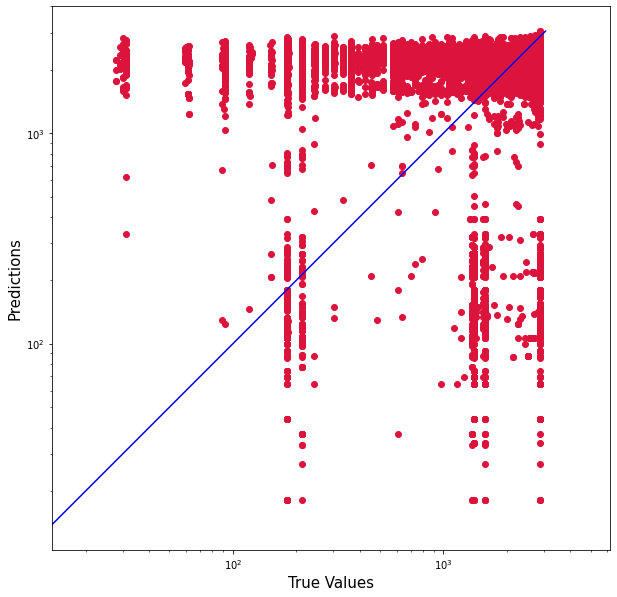

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(predictions.real, predictions.pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions.pred), max(predictions.real))
p2 = min(min(predictions.pred), min(predictions.real))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Cosas de pycharm

In [15]:
dfnew = pd.concat([X_multiple, y_multiple], axis=1)
dfnew.to_csv(r'C:\Users\María\PycharmProjects\pythonProject\dfModel1.csv', index=False)

# Clasificación  
## Variable objetivo de la clasificación

In [2]:
import pandas as pd
df = pd.read_csv('csvs/ModeloFinal.csv')
df['fecha'] = pd.to_datetime(df['fecha'])

In [8]:
df['Duracion'].describe()

count    215566.000000
mean       1455.233316
std        1341.139158
min           0.000000
25%           0.000000
50%        1553.000000
75%        2891.000000
max        2891.000000
Name: Duracion, dtype: float64

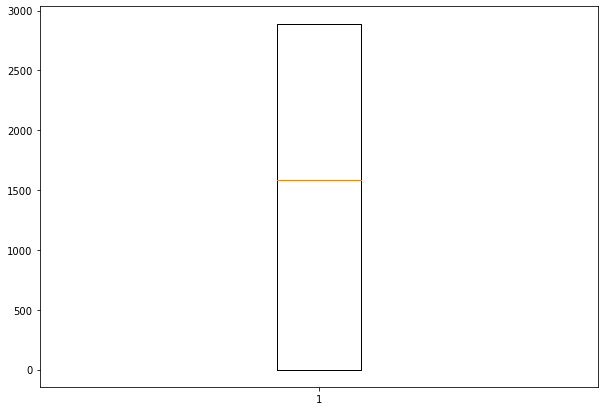

In [92]:
import matplotlib.pyplot as plt 
import numpy as np 
np.random.seed(10) 
data = df.Duracion
  
fig = plt.figure(figsize =(10, 7)) 
  
plt.boxplot(data) 
  
plt.show() 

In [9]:
df['desc_situacion_local'].value_counts()

Abierto             104655
Cerrado              85807
Uso vivienda         16251
Baja R                3727
Baja                  3064
En obras              2043
Baja PC Asociado        19
Name: desc_situacion_local, dtype: int64

In [3]:
df['Exito'] = 0
for i in df.index:
    if (df['Duracion'][i] < 2890):
        df['Exito'][i]=0
    else:
        df['Exito'][i]=1

C:\Users\MARA~1\AppData\Local\Temp/ipykernel_17592/1077293383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exito'][i]=1
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_17592/1077293383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exito'][i]=0


In [4]:
df['Exito'].value_counts()

0    134322
1     81244
Name: Exito, dtype: int64

In [11]:
df['Exito'].value_counts()

0    134322
1     81244
Name: Exito, dtype: int64

### EDA

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

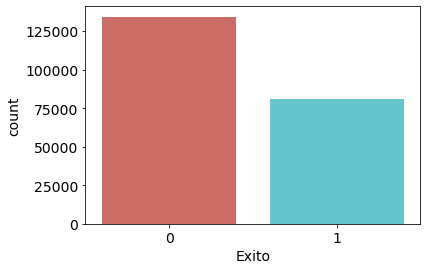

<Figure size 432x288 with 0 Axes>

In [14]:
sns.countplot(x='Exito', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [99]:
df.groupby('desc_seccion')['Duracion'].mean()

desc_seccion
99999                                                                                      133.647949
Actividades administrativas y servicios auxliares                                         2121.889852
Actividades artísticas, recreativas y de entrenimiento                                    2261.134038
Actividades de organizaciones y organismos extraterritoriales                             1212.564738
Actividades financieras y de seguros                                                      2642.826891
Actividades inmobiliarias                                                                 2120.386391
Actividades profesionales, científicas y técnicas                                         2256.421053
Actividades sanitarias y de servicios sociales                                            2344.445831
Administración Pública y defensa; Seguridad Social obligatoria                            2640.713095
Agricultura, ganadería, silvicultura y pesca                         

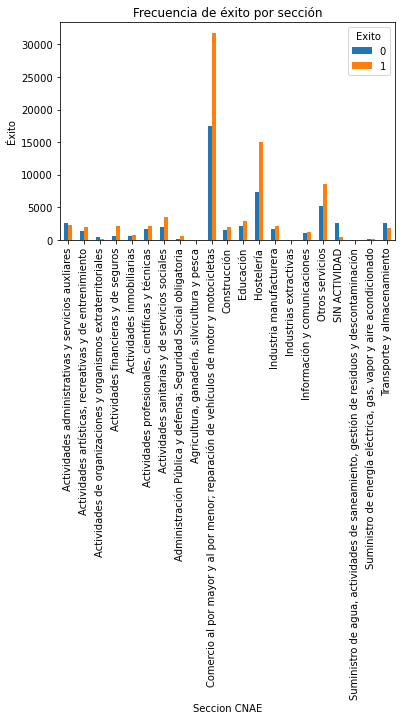

In [15]:
%matplotlib inline
pd.crosstab((df[df.desc_seccion != 99999]).desc_seccion,df.Exito).plot(kind='bar')
plt.title('Frecuencia de éxito por sección')
plt.xlabel('Seccion CNAE')
plt.ylabel('Éxito')
plt.savefig('purchase_fre_job')

Text(0, 0.5, 'Éxito')

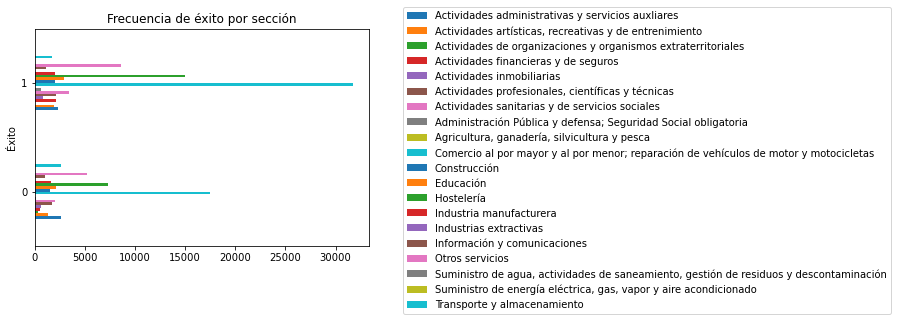

In [16]:
%matplotlib inline
plot = df[df.desc_seccion != 99999]
pd.crosstab(plot.Exito, (plot[plot.desc_seccion != 'SIN ACTIVIDAD']).desc_seccion).plot(kind='barh')
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left', borderaxespad=0)
plt.title('Frecuencia de éxito por sección')
plt.xlabel(' ')
plt.ylabel('Éxito')
# plt.savefig('purchase_fre_job')

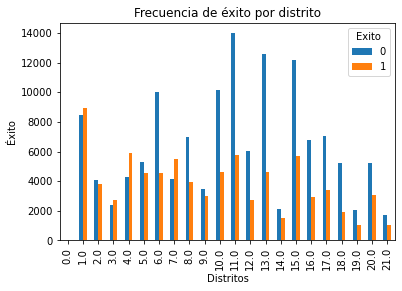

In [17]:
%matplotlib inline
pd.crosstab(df.id_distrito_local,df.Exito).plot(kind='bar')
plt.title('Frecuencia de éxito por distrito')
plt.xlabel('Distritos')
plt.ylabel('Éxito')
plt.savefig('purchase_fre_job')

In [154]:
hola = df.desc_distrito_local.unique()
adios = df.id_distrito_local.unique()
tonto = zip(hola, adios)
dict(tonto)

{'centro': 1.0,
 'arganzuela': 2.0,
 'salamanca': 4.0,
 'chamberi': 7.0,
 'retiro': 3.0,
 'chamartin': 5.0,
 'tetuan': 6.0,
 'fuencarral-el pardo': 8.0,
 'moncloa-aravaca': 9.0,
 'latina': 10.0,
 'carabanchel': 11.0,
 'usera': 12.0,
 'puente de vallecas': 13.0,
 'moratalaz': 14.0,
 'ciudad lineal': 15.0,
 'hortaleza': 16.0,
 'villaverde': 17.0,
 'villa de vallecas': 18.0,
 'vicalvaro': 19.0,
 'san blas-canillejas': 20.0,
 'barajas': 21.0,
 'valor nulo en origen': 0.0}

## Modelo clasif

https://www.datacamp.com/tutorial/understanding-logistic-regression-python

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215566 entries, 0 to 215565
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_local                   215566 non-null  float64       
 1   id_distrito_local          215566 non-null  float64       
 2   desc_distrito_local        215566 non-null  object        
 3   id_barrio_local            215566 non-null  float64       
 4   desc_barrio_local          215566 non-null  object        
 5   desc_seccion_censal_local  215566 non-null  float64       
 6   coordenada_x_local         215566 non-null  object        
 7   coordenada_y_local         215566 non-null  object        
 8   desc_situacion_local       215566 non-null  object        
 9   rotulo                     215566 non-null  object        
 10  fecha                      215566 non-null  datetime64[ns]
 11  Duracion                   215566 non-null  int64   

In [104]:
#split dataset in features and target variable
X = X_multiple # Features
y = df.Exito # Target variable

In [105]:
X_multiple = df.iloc[:,[1,3,11,13,17]]

X_multiple.id_seccion = pd.Categorical(X_multiple.id_seccion)

X_multiple['id_seccion_cat'] = 1
X_multiple['id_seccion_cat'] = X_multiple.id_seccion.cat.codes

X_multiple.drop('id_seccion', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/507761359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['id_seccion_cat'] = 1
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/507761359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [106]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [107]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[28496,  9343],
       [ 2994, 17336]], dtype=int64)

In [109]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

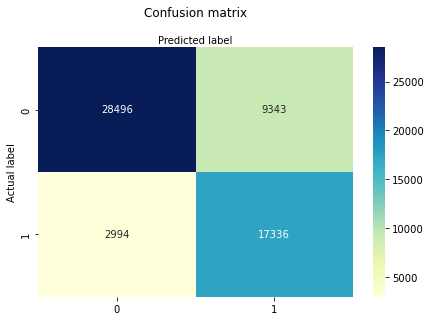

In [110]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7879110866612801
Precision: 0.6497994677461674
Recall: 0.8527299557304476


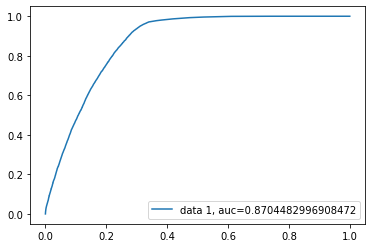

In [112]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

#### Lo mismo con DUMMIES

In [156]:
df.fillna(99999, inplace = True)

In [119]:
modelo = df.iloc[:,[2,4,13,15,19,20]]
modelo = pd.get_dummies(modelo, drop_first = True)

In [120]:
#split dataset in features and target variable
X = modelo.iloc[:,1:] # Features
y = modelo.Exito # Target variable

In [121]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X,y,test_size=0.25,random_state=0)

In [122]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train_1,y_train_1)

#
y_pred=logreg.predict(X_test_1)

In [123]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_1, y_pred)
cnf_matrix

array([[24665,  9007],
       [ 2549, 17671]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

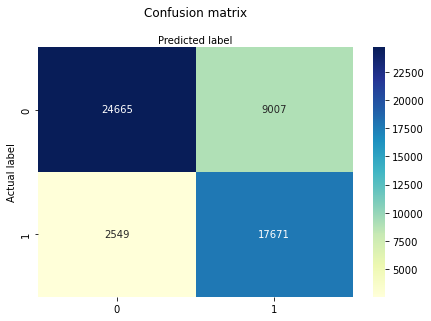

In [124]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred))
print("Precision:",metrics.precision_score(y_test_1, y_pred))
print("Recall:",metrics.recall_score(y_test_1, y_pred))

Accuracy: 0.7855711422845691
Precision: 0.662380988080066
Recall: 0.8739366963402572


In [128]:
metrics.roc_auc_score(y_test_1,  y_pred)

0.8032222089446593

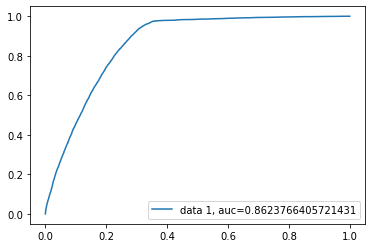

In [126]:
y_pred_proba = logreg.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### MODELO ESCALADO CON DUMMIES (ningun sentido)

https://asperbrothers.com/blog/logistic-regression-in-python/

In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then the Estimated Salary feature will dominate the Age feature when the model finds the nearest neighbor to a data point in the data space. 

In [153]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

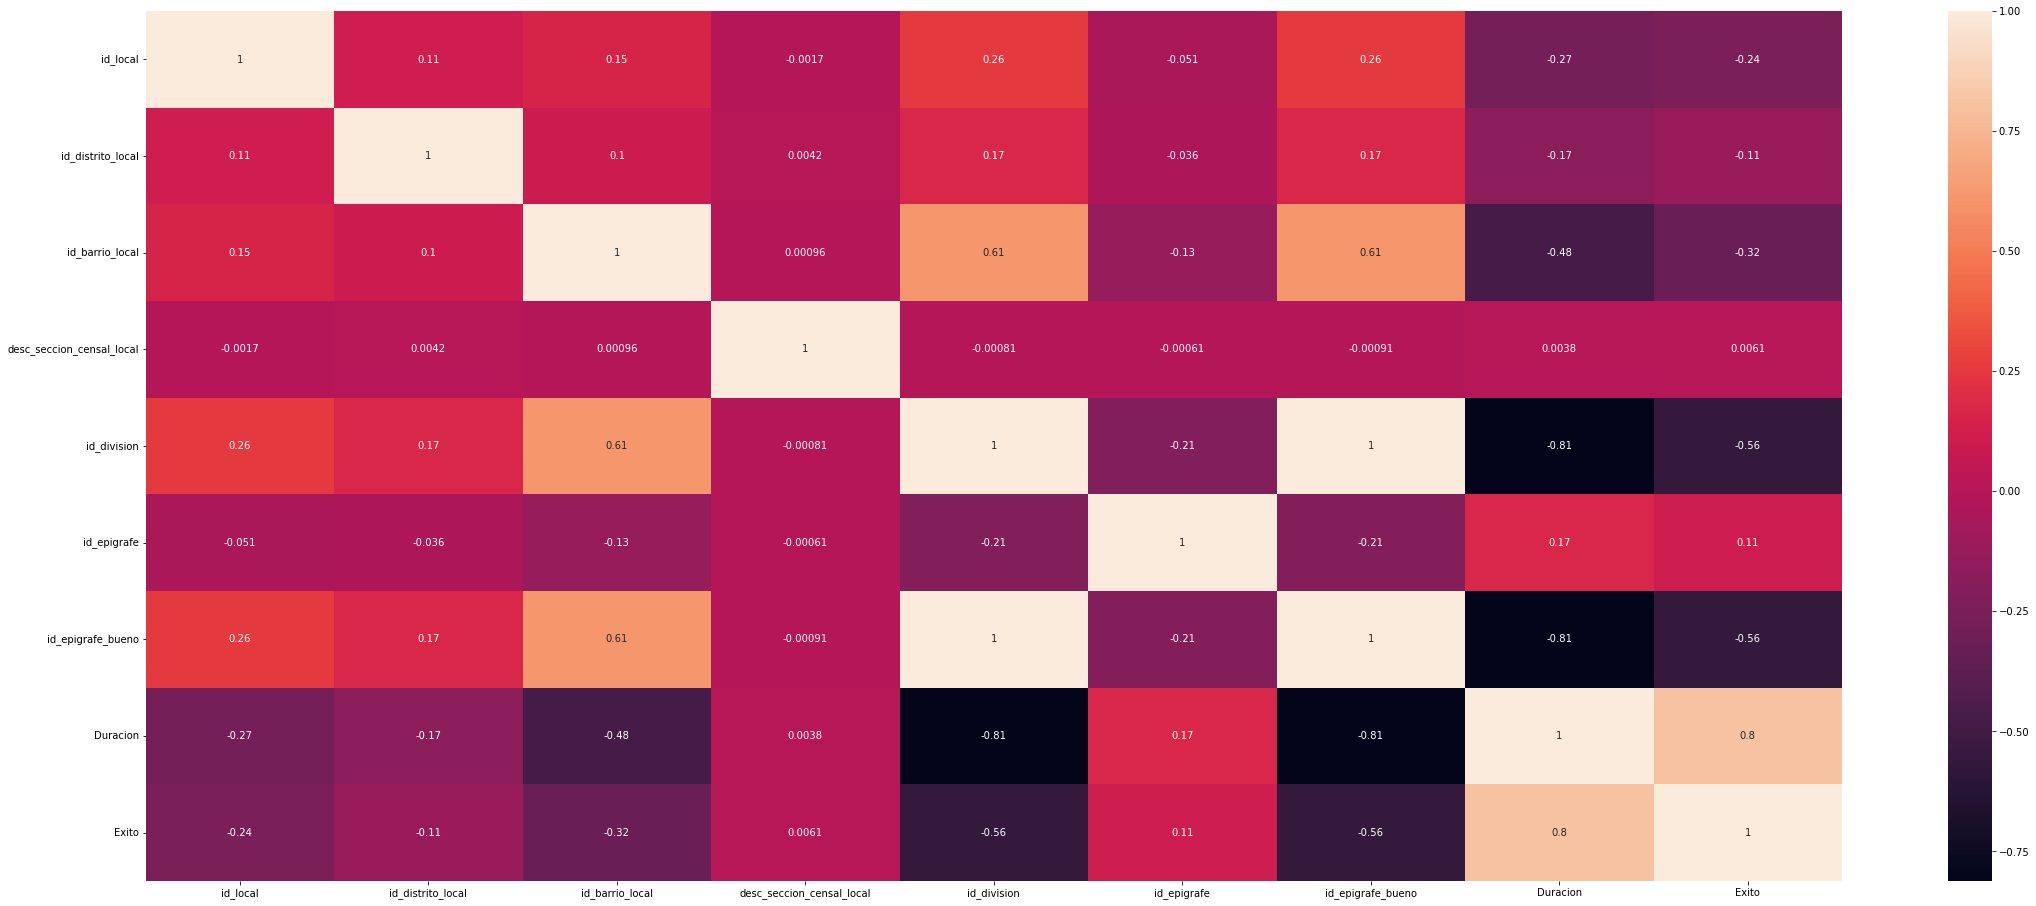

In [188]:
#NO SE HACE CORRELACION EN LAS CATEGÓRICAS
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [154]:
model = LogisticRegression()

In [155]:
model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 79.18609648651552


In [158]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [159]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 78.36682067261201


In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     30203
           1       0.65      0.85      0.73     16332

    accuracy                           0.78     46535
   macro avg       0.77      0.80      0.78     46535
weighted avg       0.81      0.78      0.79     46535



Text(0.5, 33.0, 'Predicted Values')

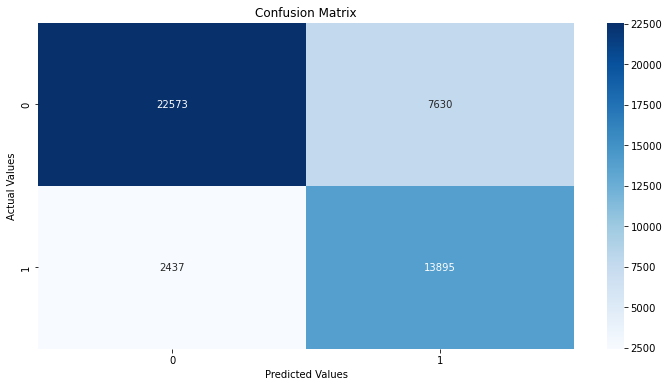

In [161]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [162]:
X_test_scaled

array([[-0.19357522, -0.11387806, -0.31384967, ...,  0.        ,
        -0.0224778 , -0.01390828],
       [-0.19357522, -0.11387806, -0.31384967, ...,  0.        ,
        -0.0224778 , -0.01390828],
       [-0.19357522, -0.11387806, -0.31384967, ...,  0.        ,
        -0.0224778 , -0.01390828],
       ...,
       [-0.19357522, -0.11387806, -0.31384967, ...,  0.        ,
        -0.0224778 , -0.01390828],
       [-0.19357522, -0.11387806, -0.31384967, ...,  0.        ,
        -0.0224778 , -0.01390828],
       [-0.19357522, -0.11387806, -0.31384967, ...,  0.        ,
        -0.0224778 , -0.01390828]])

#### ESCALADO SIN DUMMIES

In [178]:
X_multiple = df.iloc[:,[1,3,11,13,17]]

X_multiple.id_seccion = pd.Categorical(X_multiple.id_seccion)

X_multiple['id_seccion_cat'] = 1
X_multiple['id_seccion_cat'] = X_multiple.id_seccion.cat.codes

X_multiple.drop('id_seccion', axis=1, inplace=True)

y_multiple = df.Exito

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/1818404764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['id_seccion_cat'] = 1
C:\Users\MARA~1\AppData\Local\Temp/ipykernel_11444/1818404764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
X_multiple, y_multiple, test_size=0.20, random_state=5, stratify=y)

In [180]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [181]:
model = LogisticRegression()

In [182]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [183]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 74.53207263350167


In [184]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [185]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 74.05608681637477


In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76     30203
           1       0.58      0.97      0.72     16332

    accuracy                           0.74     46535
   macro avg       0.77      0.79      0.74     46535
weighted avg       0.83      0.74      0.74     46535



Text(0.5, 33.0, 'Predicted Values')

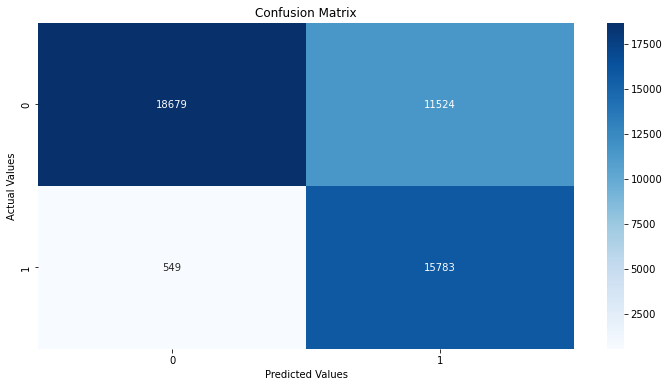

In [187]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [188]:
X_test_scaled

array([[-1.09586177, -0.4966785 , -0.81577342, -0.84071007,  0.0966707 ],
       [-0.0117954 , -0.49521775, -0.81567127, -0.83103301,  0.25288192],
       [-1.09586177,  2.02067532,  1.22621276,  1.22542846, -0.99680788],
       ...,
       [ 1.2529487 , -0.49353033,  1.22621276,  1.22542846, -0.99680788],
       [-0.0117954 , -0.49521775, -0.81567127, -0.83124999,  0.25288192],
       [ 0.53023779,  2.02067532,  1.22621276,  1.22542846, -0.99680788]])

In [190]:
model.predict([[-1.09586177, -0.4966785 , -0.81577342, -0.84071007,  0.0966707]])[0]

1

In [14]:
df.to_csv('csvs/ModeloFinalClasificacion.csv', index = False)

In [3]:
import pandas as pd
df = pd.read_csv('csvs/ModeloFinalClasificacion.csv')
df['fecha'] = pd.to_datetime(df['fecha'])

In [6]:
df.desc_epigrafe_bueno.unique()

array(['Restaurantes y puestos de comidas',
       'Hoteles y alojamientos similares',
       'Comercio al por menor de bebidas en establecimientos especializados',
       'Comercio al por menor de pan y productos de panadería, confitería y pastelería en establecimientos especializados',
       'Comercio al por menor de productos cosméticos e higiénicos en establecimientos especializados',
       'Comercio al por menor de carne y productos cárnicos en establecimientos especializados',
       'Comercio al por menor de pescados y mariscos en establecimientos especializados',
       'Otros servicios de comidas', 'Educación primaria',
       'Establecimientos de bebidas',
       'Comercio al por menor en establecimientos no especializados, con predominio en productos alimenticios, bebidas y tabaco',
       'Comercio al por menor de flores, plantas, semillas, fertilizantes, animales de compañía y alimentos para los mismos en establecimientos especializados',
       'Comercio al por menor de

## Selección de Variables

In [1]:
pip install scikit-learn==1.1.1

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [1]:
import sklearn
sklearn_version = sklearn.__version__

print(sklearn_version)

0.24.2


In [14]:
df.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'desc_situacion_local',
       'rotulo', 'fecha', 'Duracion', 'id_seccion', 'desc_seccion',
       'id_division', 'desc_division', 'id_epigrafe', 'desc_epigrafe',
       'id_epigrafe_bueno', 'desc_epigrafe_bueno', 'Exito'],
      dtype='object')

In [15]:
modelo = df.iloc[:,[2,4,13,15,19,20]]
modelo = pd.get_dummies(modelo)
modelo.columns = modelo.columns.str.replace(':','').str.replace(',','').str.replace(';','').str.replace(' ','_').str.lower()

In [16]:
#split dataset in features and target variable
X = modelo.iloc[:,1:] # Features
y = modelo.exito # Target variable

In [19]:
#https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html 
import numpy as np
def iv_woe(data, target, bins=10, show_woe=False):
    
    global lista
    lista = []
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        if (round(d['IV'].sum(),6) >= 0.015):
            print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
            lista.append(ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
        
#         #Show WOE Table
#         if show_woe == True:
#             print(d)
    return newDF, woeDF


In [20]:
iv, woe = iv_woe(data = modelo, target = 'exito', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of desc_distrito_local_centro is 0.028113
Information value of desc_distrito_local_chamberi is 0.031333
Information value of desc_distrito_local_puente_de_vallecas is 0.019833
Information value of desc_distrito_local_salamanca is 0.035317
Information value of desc_barrio_local_justicia is 0.01612
Information value of desc_barrio_local_recoletos is 0.016266
Information value of desc_seccion_99999 is 2.529171
Information value of desc_seccion_actividades_financieras_y_de_seguros is 0.040752
Information value of desc_seccion_actividades_sanitarias_y_de_servicios_sociales is 0.029552
Information value of desc_seccion_comercio_al_por_mayor_y_al_por_menor_reparación_de_vehículos_de_motor_y_motocicletas is 0.379595
Information value of desc_seccion_educación is 0.016547
Information value of desc_seccion_hostelería is 0.178521
Information value of desc_seccion_otros_servicios is 0.070685
Information value of desc_seccion_sin_actividad is 0.019
Information value of desc_divisi

In [21]:
lista

['desc_distrito_local_centro',
 'desc_distrito_local_chamberi',
 'desc_distrito_local_puente_de_vallecas',
 'desc_distrito_local_salamanca',
 'desc_barrio_local_justicia',
 'desc_barrio_local_recoletos',
 'desc_seccion_99999',
 'desc_seccion_actividades_financieras_y_de_seguros',
 'desc_seccion_actividades_sanitarias_y_de_servicios_sociales',
 'desc_seccion_comercio_al_por_mayor_y_al_por_menor_reparación_de_vehículos_de_motor_y_motocicletas',
 'desc_seccion_educación',
 'desc_seccion_hostelería',
 'desc_seccion_otros_servicios',
 'desc_seccion_sin_actividad',
 'desc_division_99999',
 'desc_division_actividades_sanitarias',
 'desc_division_comercio_al_por_menor_excepto_de_vehículos_de_motor_y_motocicletas',
 'desc_division_educación',
 'desc_division_otros_servicios_personales',
 'desc_division_sin_actividad',
 'desc_division_servicios_de_comidas_y_bebidas',
 'desc_division_servicios_financieros_excepto_seguros_y_fondos_de_pensiones',
 'desc_division_venta_y_reparación_de_vehículos_de_m

In [22]:
len(lista)

35

In [23]:
lista.append('exito')

In [25]:
modelito = modelo[lista]

In [26]:
modelito

,desc_distrito_local_centro,desc_distrito_local_chamberi,desc_distrito_local_puente_de_vallecas,desc_distrito_local_salamanca,desc_barrio_local_justicia,desc_barrio_local_recoletos,desc_seccion_99999,desc_seccion_actividades_financieras_y_de_seguros,desc_seccion_actividades_sanitarias_y_de_servicios_sociales,desc_seccion_comercio_al_por_mayor_y_al_por_menor_reparación_de_vehículos_de_motor_y_motocicletas,...,desc_epigrafe_bueno_comercio_al_por_menor_de_productos_farmacéuticos_en_establecimientos_especializados,desc_epigrafe_bueno_establecimientos_de_bebidas,desc_epigrafe_bueno_mantenimiento_y_reparación_de_vehículos_de_motor,desc_epigrafe_bueno_otro_comercio_al_por_menor_de_artículos_nuevos_en_establecimientos_especializados,desc_epigrafe_bueno_otro_comercio_al_por_menor_de_productos_alimenticios_en_establecimientos_especializados,desc_epigrafe_bueno_peluquería_y_otros_tratamientos_de_belleza,desc_epigrafe_bueno_restaurantes_y_puestos_de_comidas,desc_epigrafe_bueno_intermediacion_monetaria_bancos_cajas_de_ahorro,desc_epigrafe_bueno_local_sin_actividad,exito
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215561,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215562,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215563,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
215564,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [83]:
modelito = modelito[~np.all(modelito == 0, axis=1)]

In [84]:
X = modelito.iloc[:,:35]
y = modelito.exito

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [86]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
# y_pred=logreg.predict(X_test)

LogisticRegression(max_iter=1000)

In [87]:
y_pred=logreg.predict_proba(X_test)

In [88]:
y_pred

array([[0.97744262, 0.02255738],
       [0.19156258, 0.80843742],
       [0.28699077, 0.71300923],
       ...,
       [0.97744262, 0.02255738],
       [0.44572512, 0.55427488],
       [0.17283747, 0.82716253]])

In [89]:
#COGEMOS LA PROBABILIDAD DE QUE SEA CERO
y_pred_cero = y_pred[:,0]
y_pred_cero

array([0.97744262, 0.19156258, 0.28699077, ..., 0.97744262, 0.44572512,
       0.17283747])

In [90]:
y_pred_uno = y_pred[:,1]
y_pred_uno

array([0.02255738, 0.80843742, 0.71300923, ..., 0.02255738, 0.55427488,
       0.82716253])

In [101]:
y_predicted = []
for i in y_pred_uno:
    if i > 0.64:
        y_predicted.append(1)
    else: y_predicted.append(0)

In [96]:
from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [109]:
metrics.confusion_matrix(y_test, y_predicted)

array([[26222,  4809],
       [ 7337, 12845]], dtype=int64)

In [49]:
import matplotlib.pyplot as plt

In [50]:
import seaborn as sns

Text(0.5, 15.0, 'Predicted Labels')

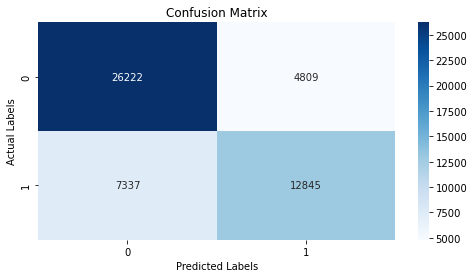

In [114]:
cm=metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

In [106]:
#new60
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.7628336555171539
Precision: 0.7275971451229183
Recall: 0.6364582301060351


In [107]:
acc = cm.diagonal()/cm.sum(axis=1)
acc

array([0.84502594, 0.63645823])

In [108]:
balanced_acc = (acc[0]+acc[1])/2
balanced_acc

0.7407420859530852

In [110]:
#auc score del test frente al predicted binario
from sklearn.metrics import roc_auc_score
#y_true is a class 0 or 1 and y_predicted is probability
roc_auc_score(y_test, y_predicted)

0.7407420859530852

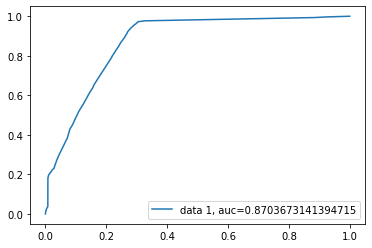

In [111]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_uno)
auc = metrics.roc_auc_score(y_test, y_pred_uno)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

pintar y_pred en un grafico. dispersion probailidad del test y marcar cuales son realmente exitos.

In [115]:
import pickle
# save the model to disk
filename = 'modelo.pickle'
pickle.dump(logreg, open(filename, 'wb'))

## Selección de variables

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [211]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [212]:
from matplotlib import pyplot

Feature 0: 975.405863
Feature 1: 1191.453697
Feature 2: 1359.116551
Feature 3: 34234.578562
Feature 4: 1513.781444
Feature 5: 1142.274018
Feature 6: 11406.222803
Feature 7: 6102.055098
Feature 8: 2608.999714
Feature 9: 34234.578562
Feature 10: 930.642234
Feature 11: 10359.066662
Feature 12: 1959.564520
Feature 13: 6145.627538
Feature 14: 1313.954956
Feature 15: 1144.875874
Feature 16: 34234.578562
Feature 17: 1368.270463
Feature 18: 1660.473778
Feature 19: 832.839618
Feature 20: 907.038215
Feature 21: 1096.092068
Feature 22: 1861.301835
Feature 23: 5615.220047
Feature 24: 1323.812956


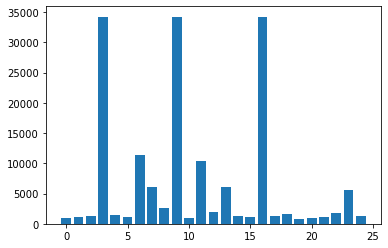

In [213]:
...
# what are scores for the features
for i in range(len(fs.scores_)):
    if (fs.scores_[i] > 100):
        print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [214]:
holita = []
for i in X.columns:
    print(i,X.columns.get_loc(i))

desc_distrito_local_centro 0
desc_distrito_local_chamberi 1
desc_distrito_local_salamanca 2
desc_seccion_99999 3
desc_seccion_actividades_financieras_y_de_seguros 4
desc_seccion_actividades_sanitarias_y_de_servicios_sociales 5
desc_seccion_comercio_al_por_mayor_y_al_por_menor_reparación_de_vehículos_de_motor_y_motocicletas 6
desc_seccion_hostelería 7
desc_seccion_otros_servicios 8
desc_division_99999 9
desc_division_actividades_sanitarias 10
desc_division_comercio_al_por_menor_excepto_de_vehículos_de_motor_y_motocicletas 11
desc_division_otros_servicios_personales 12
desc_division_servicios_de_comidas_y_bebidas 13
desc_division_servicios_financieros_excepto_seguros_y_fondos_de_pensiones 14
desc_division_venta_y_reparación_de_vehículos_de_motor_y_motocicletas 15
desc_epigrafe_bueno_99999 16
desc_epigrafe_bueno_comercio_al_por_menor_de_prendas_de_vestir_en_establecimientos_especializados 17
desc_epigrafe_bueno_comercio_al_por_menor_de_productos_farmacéuticos_en_establecimientos_especiali

In [197]:
X['desc_distrito_local_arganzuela'].index[2]

2

# Recomendación

Me dan una combinación de actividad comercial y pruebo en qué localización estaría mejor, y al revés  
Se trataría de meter los valores en un array, pasarlos por el scaler y predecir

In [222]:
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)

https://realpython.com/python-dash/

In [218]:
X_multiple

,id_distrito_local,id_barrio_local,id_division,id_epigrafe_bueno,id_seccion_cat
0,1.0,14.0,56.0,5610.0,9
1,1.0,15.0,56.0,5610.0,9
2,1.0,12.0,55.0,5510.0,9
3,1.0,11.0,47.0,4725.0,7
4,1.0,14.0,56.0,5610.0,9
...,...,...,...,...,...
232994,15.0,159.0,99999.0,99999.0,0
232995,7.0,74.0,99999.0,99999.0,0
232996,7.0,73.0,56.0,5610.0,9
232997,6.0,62.0,45.0,4520.0,7
